### An implementation of ADABOOST (`Adaptive Boosting`)
- #### On Mushroom dataset

### To
- #### classify whether the given mushroom is edible or non-edible(poisonous)

### ${@author}$
- #### `Shashwat Vaibhav`

In [1]:
## Let's import libraries
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('Imports successful!!')

Imports successful!!


In [2]:
## let's import our dataset 
path_toData = r'Data/mushrooms.csv'

data = pd.read_csv(path_toData)
print("Dataset has been loaded and stored")

Dataset has been loaded and stored


In [3]:
## as usual some descriptive statistics
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
## It's clear, none of the attributes have null or missing values
## Also there 8124 instances, 23 features and every feature is of type object(categorical)

data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


####  From the description, it is clear that some of the features such as
#### `gill-attachment, gill-spacing, veil type, veil color`, etc are highly class imbalanced. Don't believe me? You can always use sns.countplot() to verify the same.
#### The Feature `class` has two values:
- ##### `e`- edible
- ##### `p`- poisonous
#### Further details about columns and their values can be found in
- ##### `Data/agaricus-lepiota.names`

In [6]:
## Let's visualize number of unique value features

unique_feature = data.describe().T.reset_index().sort_values("unique")

Text(0.5, 1.0, 'Unqiue values per feature')

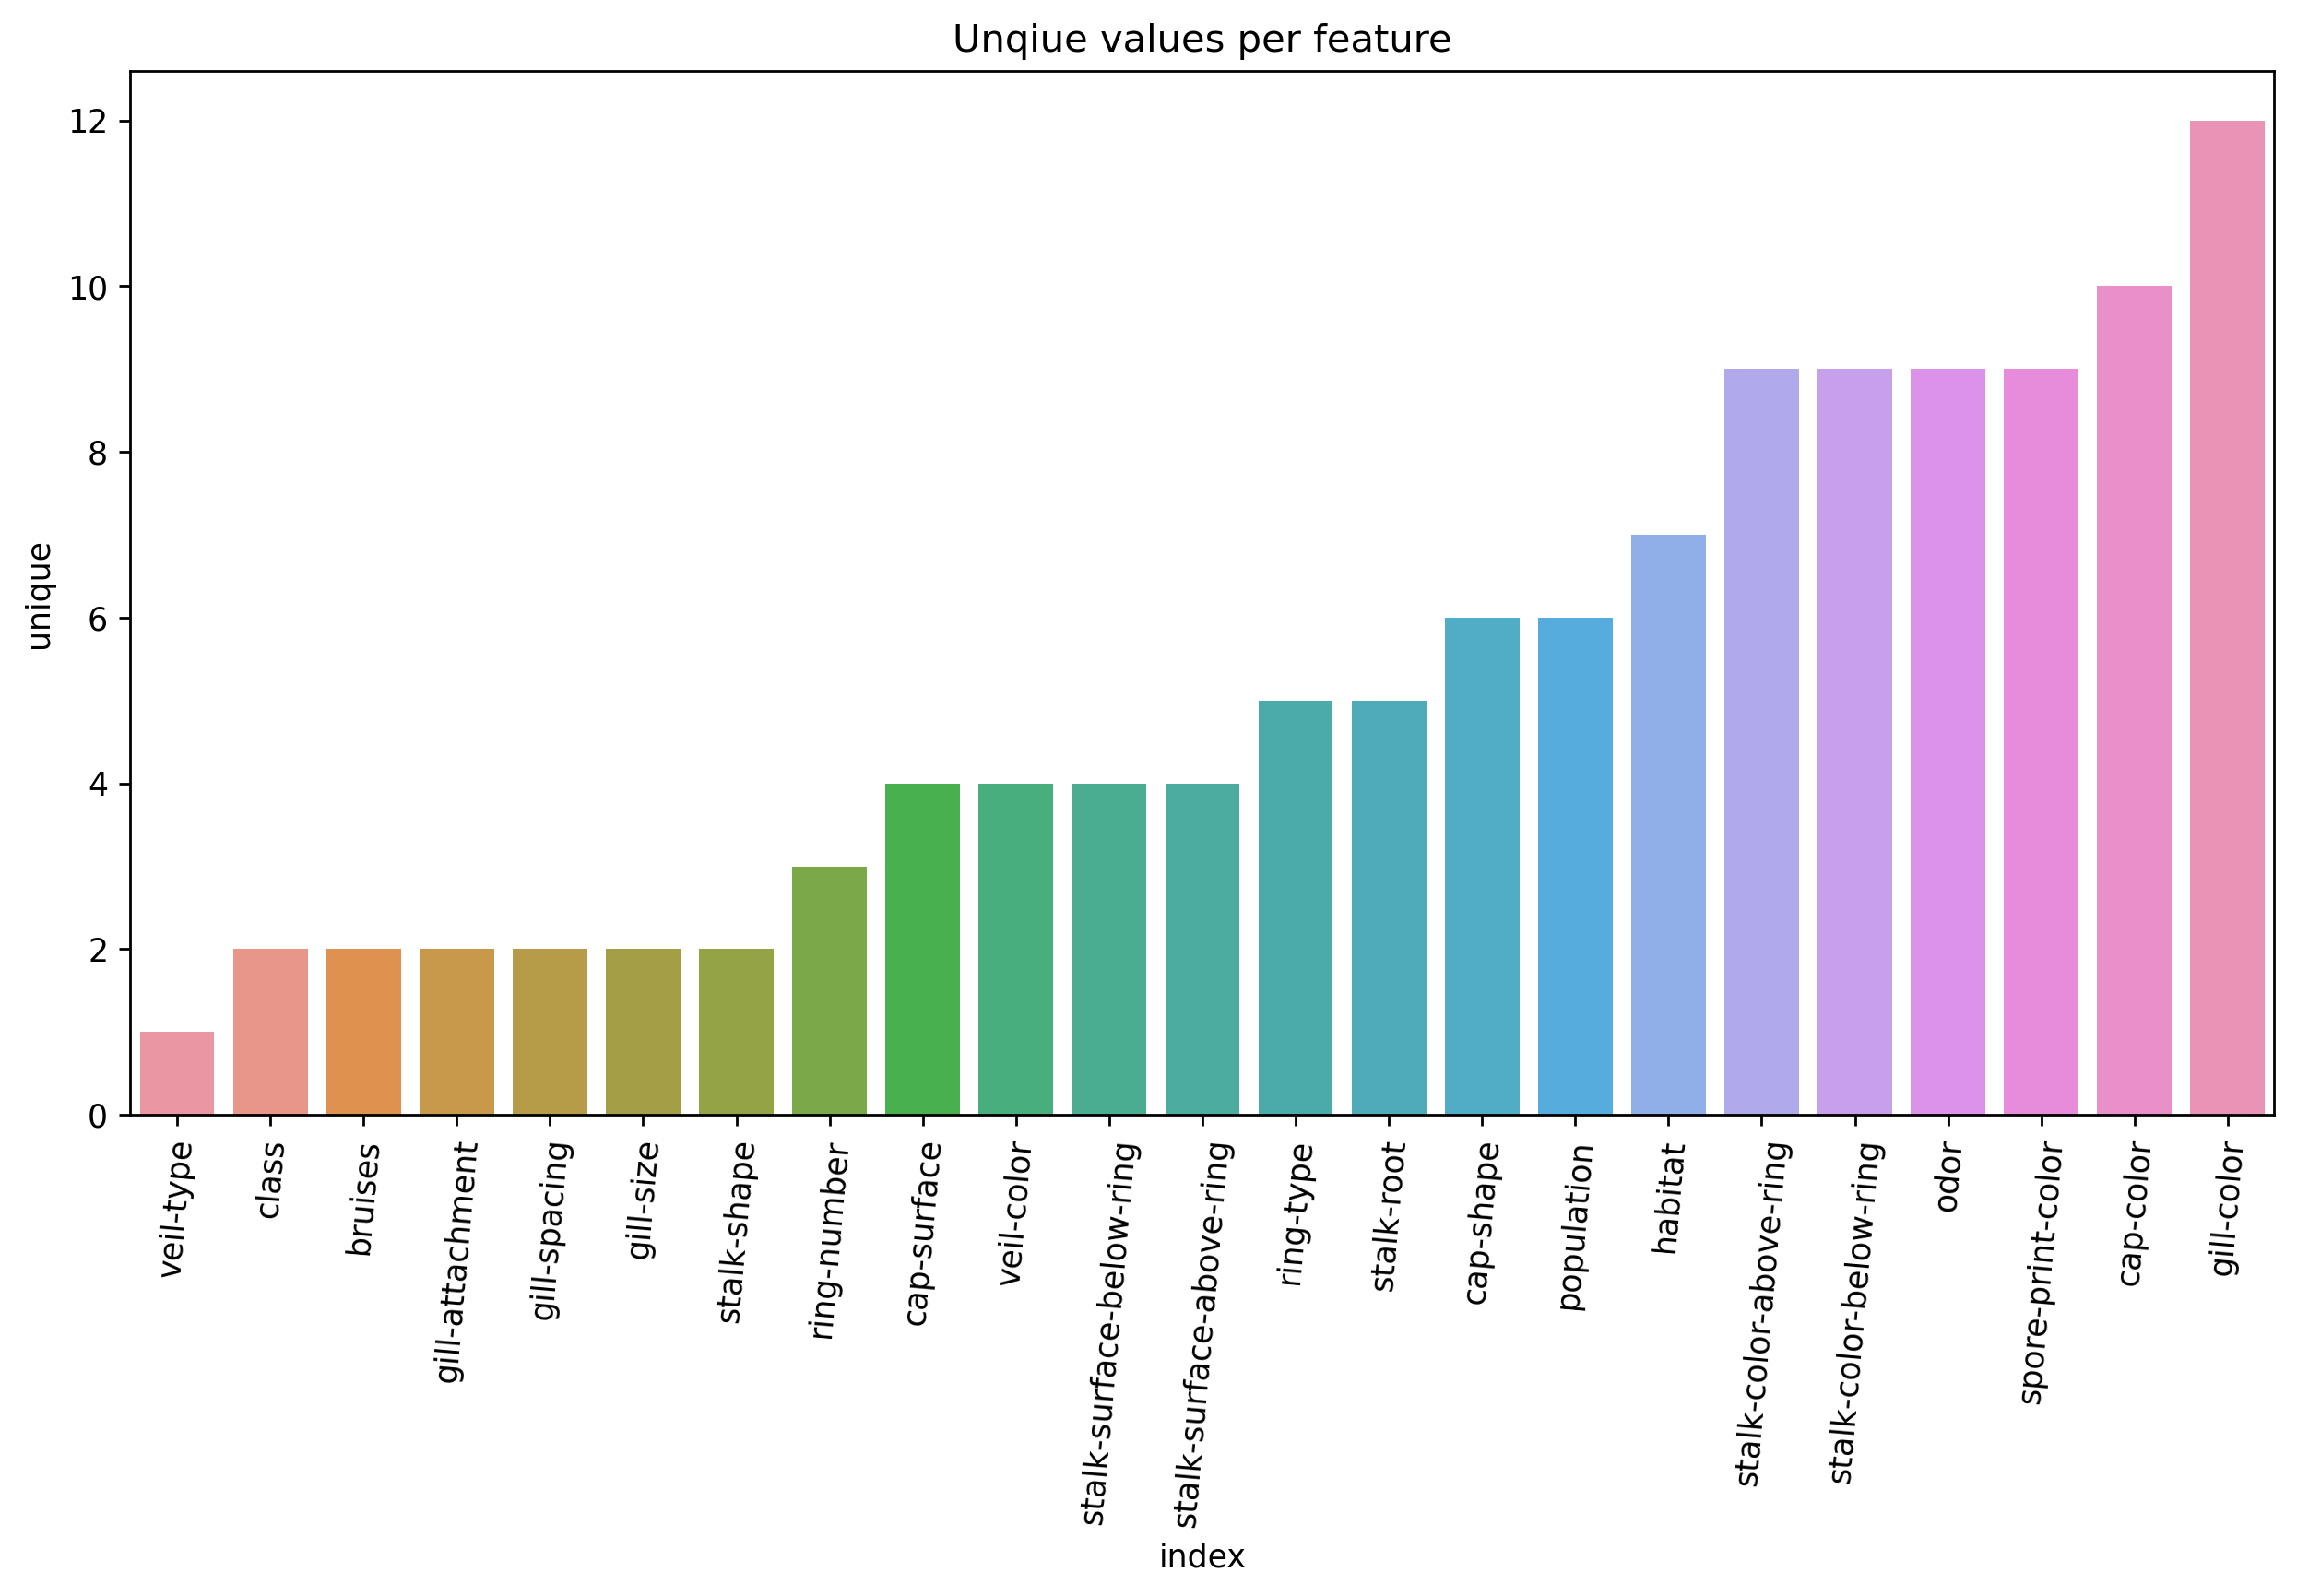

In [7]:
size = (12,6)
dpi = 250
plt.figure(figsize=size, dpi = dpi)
##params set, Now plot
sns.barplot(data=unique_feature, x= 'index', y='unique')
plt.xticks(rotation=85);
plt.title("Unqiue values per feature")

In [8]:
## This plot was solely done to be of some use while preparing guidelines for users as it is difficult to intuitively
## judge a feature with too many o too less uniqueness

### Preparing Data for modelling. Target feature is `"class"`

In [9]:
X = data.drop('class', axis = 1)
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
Y = data['class']

In [25]:
## Let's convert from nominal to numeric 
X = pd.get_dummies(X, drop_first=True) ##drop_first set to True implies (n-1) dummies from n nominal labels
print(f'Number  of columns after encoding: {len(X.columns)}')
X

Number  of columns after encoding: 95


,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [12]:
## Let's call our friend...SKLEARN
from sklearn.model_selection import train_test_split as tts

In [13]:
Xtrain, Xtest, Ytrain, Ytest = tts(X, Y, train_size = 0.85, random_state=21)

In [14]:
from sklearn.ensemble import AdaBoostClassifier as ABC

In [15]:
## by default the base estimator is a STUMP - a decision tree with max depth =1 [1 node, 2 leaves]
model = ABC(n_estimators=1)
## why n_estimator =1? --> ABC will select best feature for the STUMP to classify[Initial step in boosting]
## Let's fit the model
model.fit(Xtrain, Ytrain)
print('Model fitted')

Model fitted


In [16]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [17]:
## Let's predict now
predicted = model.predict(Xtest)
print('predicted')
predicted


predicted


array(['p', 'p', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [18]:
print(f'Accuracy on test data: {accuracy_score(predicted,Ytest)*100} %')

Accuracy on test data: 88.84331419196062 %


In [19]:
print(classification_report(Ytest, predicted))

              precision    recall  f1-score   support

           e       0.97      0.81      0.88       637
           p       0.83      0.97      0.89       582

    accuracy                           0.89      1219
   macro avg       0.90      0.89      0.89      1219
weighted avg       0.90      0.89      0.89      1219



Based upon the accuracy score and the classification report, The sole stump has done pretty good 

In [20]:
## Let's find out which feature is given the most importance by this stump(weak learner)

index_of_feat = model.feature_importances_.argmax()
print(f'The most important column/feature for the STUMP is ---> {data.columns[index_of_feat]}')

The most important column/feature for the STUMP is ---> habitat


In [21]:
data['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

<AxesSubplot:xlabel='habitat', ylabel='count'>

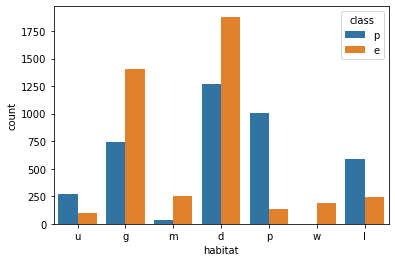

In [22]:
## depending upon the habitat ( grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d)
## the STUMP could predict whether the mushroom is edible or not with 88% accuracy
sns.countplot(data=data, x='habitat', hue='class')

In [24]:
## Inferences?? We can issue guidelines such as:-
## ->don't eat any mushroom found on waste
## -> if the mushroom is found in the woods, it cannot be surely said that the mushroom is edible or not
## -> if the mushroom is found across path or is found on leaves, it can be said that
### --> the mushroom is edible (with higher probability)

<p> Every stump assigns some extra weightage to attributes misclassified by the previous stump.
Basically, every new stump learns something from previous one. But, after certain amount stump creation,
The number of new stumps do not play any extra role so as to minimize error, as error gets 
    stabilized. Also, another concern is overfitting(what? - you can refer from  the internet)</p>

In [27]:
## Let's plot the error rates in successive creation(in series) of stumps

rate_of_errors = list() ## list of errors from each stump
significant_feats_index = list() ## list of significant feature selected from every stump
end = len(X.columns) + 1 ##remember that after encoding, number of features has increased to 95.. use len(X.columns)
                         ## to see the results
for num_of_est in np.arange(1, end):
    dummy_model = ABC(n_estimators = num_of_est)
    ##  By default, Base estimator ---> a Decision Tree, with max depth 1 ---> basically a stump.
    ## accuracy_score has been imported already from sklearn
    
    ## fitting model
    dummy_model.fit(Xtrain, Ytrain)
    temp_prediction = dummy_model.predict(Xtest) ## predicting on Xtest
    accuracy = accuracy_score(temp_prediction, Ytest)
    
    error = 1 - accuracy
    ##append this error to the list
    rate_of_errors.append(error)
    
    ## find index of most_iimportant feature
    index = dummy_model.feature_importances_.argmax()
    significant_feats_index.append(index)
    

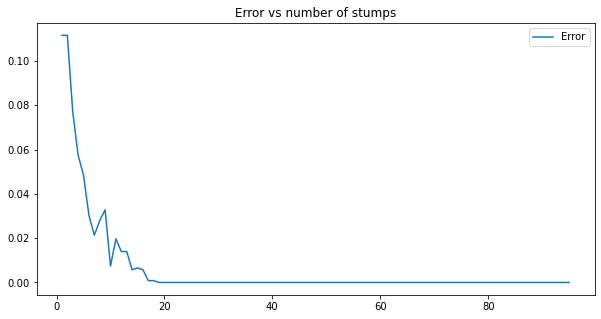

In [29]:
# end = len(X.columns) +1
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,end), rate_of_errors, label='Error')
plt.title('Error vs number of stumps')
plt.legend()

<p>
    It can be seen that after around n
</p>